In [1]:
#Cargamos librerías
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
import warnings

# Desactivar todos los warnings temporalmente
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
# Configura pandas para que muestre todos los nombres de columna completos
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
# Configurar pandas y NumPy para mostrar los números en notación decimal
# pd.set_option('display.float_format', '{:.3f}'.format)
# np.set_printoptions(suppress=True)

In [3]:
# Cambiar al directorio deseado
directorio = r"G:/Unidades compartidas/Rocío doctorado/Proyecto NLP/Datos/LDA"
os.chdir(directorio)

# Confirmar el cambio
print(f"Nuevo directorio: {os.getcwd()}")


Nuevo directorio: G:\Unidades compartidas\Rocío doctorado\Proyecto NLP\Datos\LDA


In [4]:
# Crear un diccionario para almacenar las tablas
tablas = {}

# Leer archivos que empiezan con una mayúscula
for archivo in os.listdir(directorio):
    if archivo[0].isupper() and archivo.endswith('.csv'):  # Filtra archivos que empiezan con mayúscula y terminan en .csv
        nombre_tabla = os.path.splitext(archivo)[0]  # Extrae el nombre del archivo sin la extensión
        ruta_archivo = os.path.join(directorio, archivo)  # Obtiene la ruta completa del archivo
        
        # Cargar el archivo como un DataFrame
        tablas[nombre_tabla] = pd.read_csv(ruta_archivo)

# Confirmar la lectura de archivos
print(f"Se cargaron {len(tablas)} tablas:")
for nombre, df in tablas.items():
    print(f"- {nombre}: {df.shape}")

Se cargaron 16 tablas:
- RF_best_parametros_caracteristicas_contextuales_LDA: (2, 6)
- DT_best_parametros_caracteristicas_contextuales_LDA: (2, 6)
- RL_best_parametros_caracteristicas_contextuales_LDA: (2, 6)
- RF_best_parametros_unigramas_LDA: (2, 6)
- AB_best_parametros_caracteristicas_contextuales_LDA: (2, 6)
- AB_best_parametros_unigramas_chi_LDA: (2, 6)
- DT_best_parametros_unigramas_chi_LDA: (2, 6)
- RL_best_parametros_unigramas_chi_LDA: (2, 6)
- AB_best_analisis_sentimiento_LDA: (2, 6)
- AB_best_todas_variables_LDA: (2, 6)
- DT_best_parametros_analisis_sentimiento_LDA: (2, 6)
- RF_best_parametros_todas_variables_LDA: (2, 6)
- RL_best_parametros_analisis_sentimiento_LDA: (2, 6)
- RL_best_parametros_todas_variables_LDA: (2, 6)
- RF_best_parametros_analisis_sentimiento_LDA: (2, 6)
- DT_best_parametros_todas_variablesDe_LDA: (2, 6)


In [5]:
tablas['RF_best_parametros_unigramas_LDA']

,Unnamed: 0,Accuracy,Sensitivity,Specificity,F1 Score,ROC AUC
0,Entrenamiento,0.9881,0.9897,0.9873,0.9826,0.9982
1,Prueba,0.9205,0.8884,0.9372,0.8842,0.9710


In [6]:
# quiero elegir la mejor combinacion de cada modelo y las guardo en una tabla para luego hacer el grafico de barra
modelos=["car_cont", "car_cont","sent", "sent", "unigr", "unigr","all_var" , "all_var" ]

print(modelos)
resultados_RF=pd.concat([tablas['RF_best_parametros_caracteristicas_contextuales_LDA'],tablas['RF_best_parametros_analisis_sentimiento_LDA'], tablas['RF_best_parametros_unigramas_LDA'], tablas['RF_best_parametros_todas_variables_LDA']], axis=0)
#resultados_yuyitos['Modelos']=modelos

resultados_RF['Models']=modelos
resultados_RF

['car_cont', 'car_cont', 'sent', 'sent', 'unigr', 'unigr', 'all_var', 'all_var']


,Unnamed: 0,Accuracy,Sensitivity,Specificity,F1 Score,ROC AUC,Models
0,Entrenamiento,0.9620,0.9212,0.9830,0.9428,0.9925,car_cont
1,Prueba,0.6087,0.3122,0.7624,0.3527,0.5724,car_cont
0,Entrenamiento,0.6608,0.0013,0.9997,0.0027,0.5342,sent
1,Prueba,0.6586,0.0009,0.9996,0.0018,0.5300,sent
0,Entrenamiento,0.9881,0.9897,0.9873,0.9826,0.9982,unigr
1,Prueba,0.9205,0.8884,0.9372,0.8842,0.9710,unigr
0,Entrenamiento,1.0000,0.9999,1.0000,1.0000,1.0000,all_var
1,Prueba,0.9201,0.8806,0.9407,0.8828,0.9733,all_var


In [7]:
# quiero elegir la mejor combinacion de cada modelo y las guardo en una tabla para luego hacer el grafico de barra
modelos=["car_cont", "car_cont","sent", "sent", "unigr", "unigr","all_var" , "all_var" ]

print(modelos)
resultados_RL=pd.concat([tablas['RL_best_parametros_caracteristicas_contextuales_LDA'],tablas['RL_best_parametros_analisis_sentimiento_LDA'], tablas['RL_best_parametros_unigramas_chi_LDA'], tablas['RL_best_parametros_todas_variables_LDA']], axis=0)
#resultados_yuyitos['Modelos']=modelos

resultados_RL['Models']=modelos
resultados_RL

['car_cont', 'car_cont', 'sent', 'sent', 'unigr', 'unigr', 'all_var', 'all_var']


,Unnamed: 0,Accuracy,Sensitivity,Specificity,F1 Score,ROC AUC,Models
0,Entrenamiento,0.6604,0.0005,0.9994,0.0009,0.5424,car_cont
1,Prueba,0.6583,0.0005,0.9994,0.0009,0.5392,car_cont
0,Entrenamiento,0.6606,0.0000,1.0000,0.0000,0.5180,sent
1,Prueba,0.6586,0.0001,1.0000,0.0002,0.5182,sent
0,Entrenamiento,0.9125,0.8788,0.9299,0.8721,0.9672,unigr
1,Prueba,0.9083,0.8765,0.9248,0.8672,0.9638,unigr
0,Entrenamiento,0.9133,0.8787,0.9311,0.8731,0.9677,all_var
1,Prueba,0.9081,0.8747,0.9254,0.8667,0.9643,all_var


In [8]:
# quiero elegir la mejor combinacion de cada modelo y las guardo en una tabla para luego hacer el grafico de barra
modelos=["car_cont", "car_cont","sent", "sent", "unigr", "unigr","all_var" , "all_var" ]

print(modelos)
resultados_DT=pd.concat([tablas['DT_best_parametros_caracteristicas_contextuales_LDA'],tablas['DT_best_parametros_analisis_sentimiento_LDA'], tablas['DT_best_parametros_unigramas_chi_LDA'], tablas['DT_best_parametros_todas_variablesDe_LDA']], axis=0)
#resultados_yuyitos['Modelos']=modelos

resultados_DT['Models']=modelos
resultados_DT

['car_cont', 'car_cont', 'sent', 'sent', 'unigr', 'unigr', 'all_var', 'all_var']


,Unnamed: 0,Accuracy,Sensitivity,Specificity,F1 Score,ROC AUC,Models
0,Entrenamiento,0.9621,0.8988,0.9946,0.9415,0.9964,car_cont
1,Prueba,0.5947,0.3788,0.7066,0.3895,0.5380,car_cont
0,Entrenamiento,0.6608,0.0013,0.9997,0.0027,0.5342,sent
1,Prueba,0.6586,0.0010,0.9996,0.0020,0.5299,sent
0,Entrenamiento,0.9430,0.9474,0.9408,0.9186,0.9830,unigr
1,Prueba,0.9119,0.9004,0.9178,0.8747,0.9353,unigr
0,Entrenamiento,0.9452,0.9515,0.9420,0.9219,0.9841,all_var
1,Prueba,0.9115,0.9017,0.9166,0.8744,0.9309,all_var


In [9]:
# quiero elegir la mejor combinacion de cada modelo y las guardo en una tabla para luego hacer el grafico de barra
modelos=["car_cont", "car_cont","sent", "sent", "unigr", "unigr","all_var" , "all_var" ]

print(modelos)
resultados_AB=pd.concat([tablas['AB_best_parametros_caracteristicas_contextuales_LDA'],tablas['AB_best_analisis_sentimiento_LDA'], tablas['AB_best_parametros_unigramas_chi_LDA'], tablas['AB_best_todas_variables_LDA']], axis=0)
#resultados_yuyitos['Modelos']=modelos

resultados_AB['Models']=modelos
resultados_AB

['car_cont', 'car_cont', 'sent', 'sent', 'unigr', 'unigr', 'all_var', 'all_var']


,Unnamed: 0,Accuracy,Sensitivity,Specificity,F1 Score,ROC AUC,Models
0,Entrenamiento,0.6608,0.0047,0.9979,0.0093,0.5591,car_cont
1,Prueba,0.6578,0.0037,0.9970,0.0074,0.5456,car_cont
0,Entrenamiento,0.6607,0.0010,0.9996,0.0021,0.5324,sent
1,Prueba,0.6587,0.0010,0.9997,0.0021,0.5305,sent
0,Entrenamiento,0.9046,0.8700,0.9225,0.8610,0.9656,unigr
1,Prueba,0.9043,0.8701,0.9220,0.8613,0.9640,unigr
0,Entrenamiento,0.9055,0.8710,0.9233,0.8623,0.9658,all_var
1,Prueba,0.9052,0.8714,0.9227,0.8626,0.9645,all_var


In [10]:
resultados_DT.columns

Index(['Unnamed: 0', 'Accuracy', 'Sensitivity', 'Specificity', 'F1 Score',
       'ROC AUC', 'Models'],
      dtype='object')

In [11]:
# Lista de columnas que deseas multiplicar por 100
columnas_a_multiplicar = ['Sensitivity','Specificity', 'Accuracy', 'F1 Score', 'ROC AUC']

# Multiplicar por 100 las columnas seleccionadas
resultados_RF[columnas_a_multiplicar] = resultados_RF[columnas_a_multiplicar].apply(lambda x: round(x * 100, 2))

# Multiplicar por 100 las columnas seleccionadas
resultados_RL[columnas_a_multiplicar] = resultados_RL[columnas_a_multiplicar].apply(lambda x: round(x * 100, 2))
# Multiplicar por 100 las columnas seleccionadas
resultados_AB[columnas_a_multiplicar] = resultados_AB[columnas_a_multiplicar].apply(lambda x: round(x * 100, 2))
# Multiplicar por 100 las columnas seleccionadas
resultados_DT[columnas_a_multiplicar] = resultados_DT[columnas_a_multiplicar].apply(lambda x: round(x * 100, 2))
# Mostrar el DataFrame actualizado

# Mostrar el DataFrame actualizado
resultados_RF





,Unnamed: 0,Accuracy,Sensitivity,Specificity,F1 Score,ROC AUC,Models
0,Entrenamiento,96.20,92.12,98.30,94.28,99.25,car_cont
1,Prueba,60.87,31.22,76.24,35.27,57.24,car_cont
0,Entrenamiento,66.08,0.13,99.97,0.27,53.42,sent
1,Prueba,65.86,0.09,99.96,0.18,53.00,sent
0,Entrenamiento,98.81,98.97,98.73,98.26,99.82,unigr
1,Prueba,92.05,88.84,93.72,88.42,97.10,unigr
0,Entrenamiento,100.00,99.99,100.00,100.00,100.00,all_var
1,Prueba,92.01,88.06,94.07,88.28,97.33,all_var


In [12]:
def guardar_grafico_metricas( metrica):
    # Crear un gráfico de ejemplo (sustituye esto con tu propio gráfico)
    

    # Generar el nombre del archivo usando el valor de sheet_name
    nombre_archivo = '{}.png'.format(metrica)

    # Combinar la ruta y el nombre del archivo
    ruta_completa = '{}\\{}'.format(ruta_graficos, nombre_archivo).replace('\\', '/')
    

    # Guardar el gráfico en la ubicación especificada
    plt.savefig(ruta_completa)
    plt.show()
    # Mostrar el gráfico (opcional)


In [13]:
resultados_RF = resultados_RF.rename(columns={
    'Specificity': 'Especificidad', 
    'F1 Score': 'Recall', 
    'Sensitivity': 'Sensibilidad',
    'Unnamed: 0': 'Conjunto'
})
resultados_RL = resultados_RL.rename(columns={
    'Specificity': 'Especificidad', 
    'F1 Score': 'Recall', 
    'Sensitivity': 'Sensibilidad',
    'Unnamed: 0': 'Conjunto'
})
resultados_DT = resultados_DT.rename(columns={
    'Specificity': 'Especificidad', 
    'F1 Score': 'Recall', 
    'Sensitivity': 'Sensibilidad',
    'Unnamed: 0': 'Conjunto'
})
resultados_AB = resultados_AB.rename(columns={
    'Specificity': 'Especificidad', 
    'F1 Score': 'Recall', 
    'Sensitivity': 'Sensibilidad',
    'Unnamed: 0': 'Conjunto'
})


In [14]:
ruta_graficos=('G:/Unidades compartidas/Rocío doctorado/Proyecto NLP/Graficos')

In [15]:
resultados_RF.columns

Index(['Conjunto', 'Accuracy', 'Sensibilidad', 'Especificidad', 'Recall',
       'ROC AUC', 'Models'],
      dtype='object')

In [16]:
print(resultados_RF)

        Conjunto  Accuracy  Sensibilidad  Especificidad  Recall  ROC AUC  \
0  Entrenamiento     96.20         92.12          98.30   94.28    99.25   
1         Prueba     60.87         31.22          76.24   35.27    57.24   
0  Entrenamiento     66.08          0.13          99.97    0.27    53.42   
1         Prueba     65.86          0.09          99.96    0.18    53.00   
0  Entrenamiento     98.81         98.97          98.73   98.26    99.82   
1         Prueba     92.05         88.84          93.72   88.42    97.10   
0  Entrenamiento    100.00         99.99         100.00  100.00   100.00   
1         Prueba     92.01         88.06          94.07   88.28    97.33   

     Models  
0  car_cont  
1  car_cont  
0      sent  
1      sent  
0     unigr  
1     unigr  
0   all_var  
1   all_var  


RANDOM FOREST

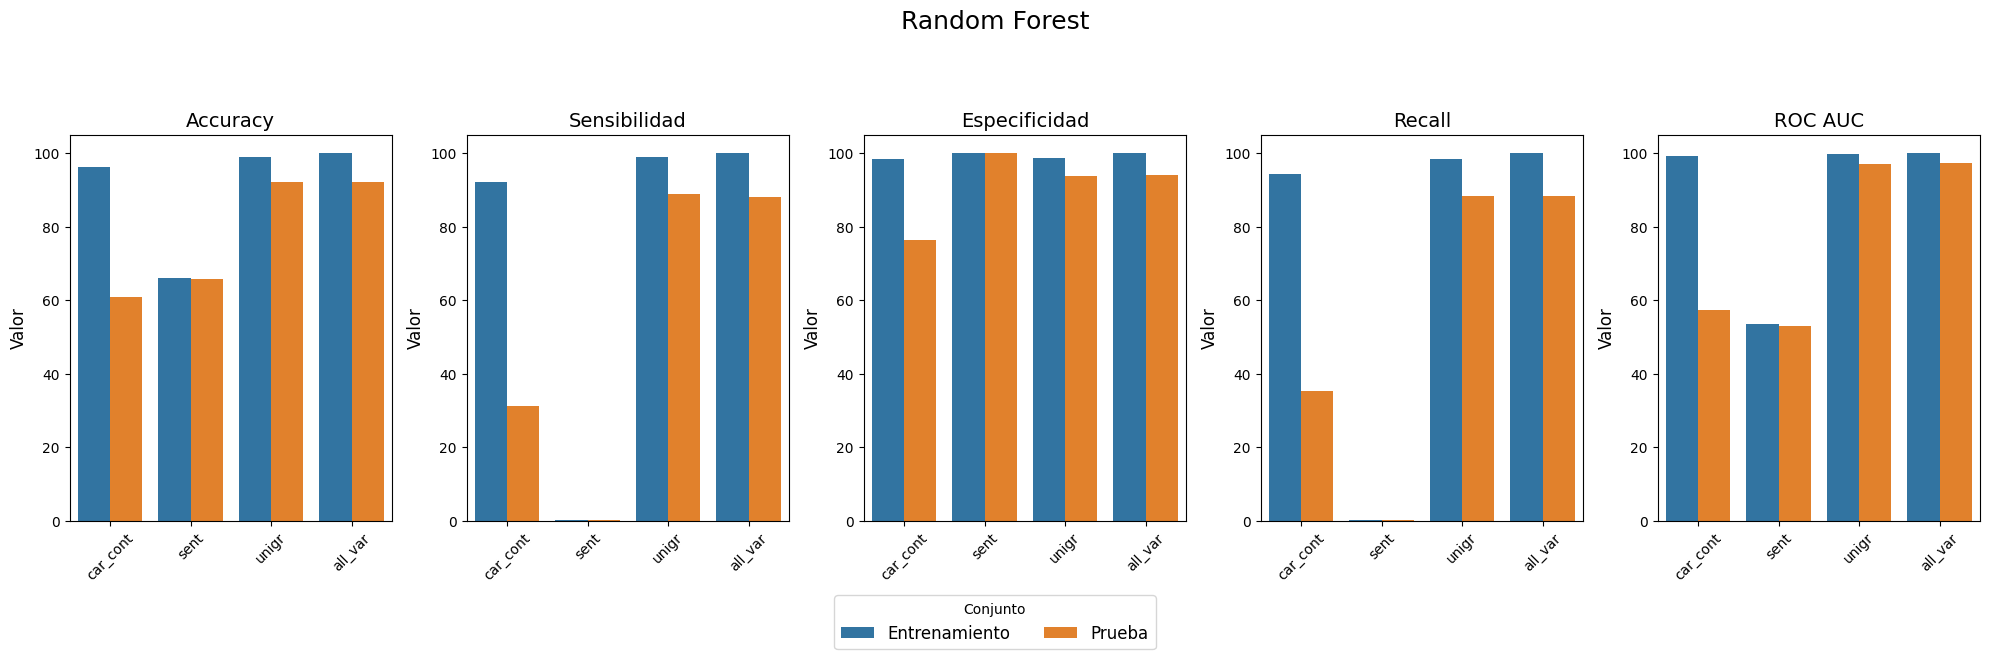

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convertir los datos a formato largo
resultados_long = pd.melt(resultados_RF, id_vars=['Models', 'Conjunto'], 
                          value_vars=['Accuracy', 'Sensibilidad', 'Especificidad', 'Recall', 'ROC AUC'],
                          var_name='Metric', value_name='Value')

# Crear el gráfico con subgráficos
fig, axes = plt.subplots(1, 5, figsize=(20, 6))  # 1 fila y 5 columnas de subgráficos
fig.suptitle('Random Forest', fontsize=18)  # Título general

# Lista de métricas
metrics = ['Accuracy', 'Sensibilidad', 'Especificidad', 'Recall', 'ROC AUC']

# Inicializar manejadores y etiquetas para la leyenda común
handles, labels = None, None

# Crear los gráficos de barras para cada métrica
for i, metric in enumerate(metrics):
    ax = axes[i]
    barplot = sns.barplot(x='Models', y='Value', hue='Conjunto', 
                          data=resultados_long[resultados_long['Metric'] == metric], ax=ax)
    ax.set_title(metric, fontsize=14)  # Subtítulo con el nombre de la métrica
    ax.set_xlabel('')  # No mostrar etiquetas en el eje x para evitar solapamientos
    ax.set_ylabel('Valor', fontsize=12)
    ax.tick_params(axis='x', rotation=45)  # Rotar etiquetas del eje x para mejor visibilidad
    
    # Obtener manejadores y etiquetas de la primera métrica
    if handles is None and labels is None:
        handles, labels = ax.get_legend_handles_labels()
    ax.legend_.remove()  # Eliminar leyendas individuales

# Añadir una leyenda común debajo de los gráficos
fig.legend(handles, labels, title='Conjunto', loc='lower center', ncol=2, fontsize=12, bbox_to_anchor=(0.5, -0.10))

# Ajustar la disposición para evitar solapamientos
plt.tight_layout(rect=[0, 0, 1, 0.90])  # Ajustar el layout para el título general y la leyenda
plt.show()


REGRESION LOGISTICA

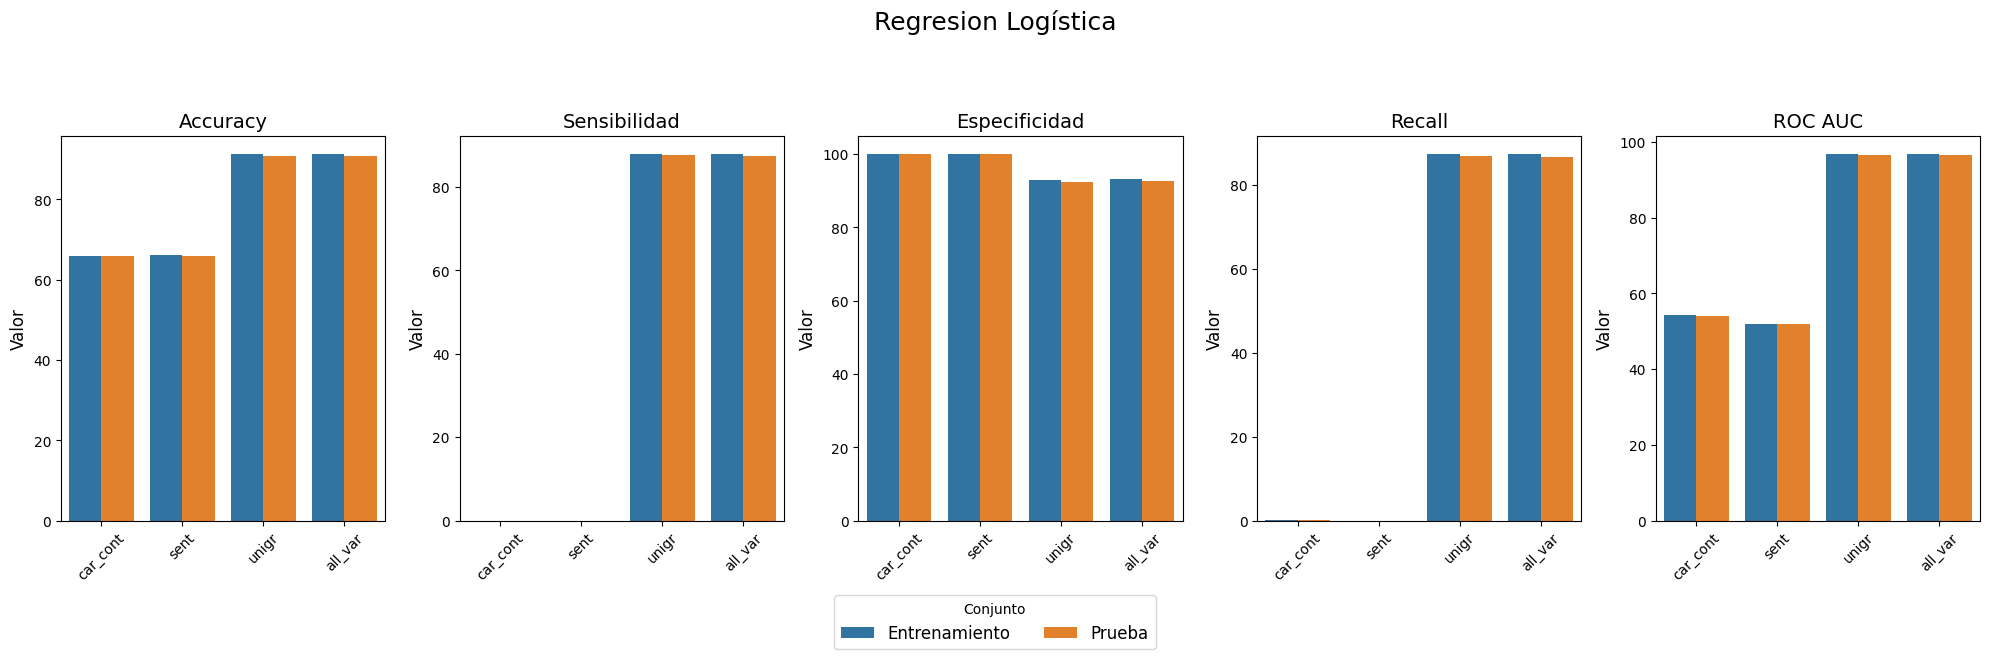

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convertir los datos a formato largo
resultados_long = pd.melt(resultados_RL, id_vars=['Models', 'Conjunto'], 
                          value_vars=['Accuracy', 'Sensibilidad', 'Especificidad', 'Recall', 'ROC AUC'],
                          var_name='Metric', value_name='Value')

# Crear el gráfico con subgráficos
fig, axes = plt.subplots(1, 5, figsize=(20, 6))  # 1 fila y 5 columnas de subgráficos
fig.suptitle('Regresion Logística', fontsize=18)  # Título general

# Lista de métricas
metrics = ['Accuracy', 'Sensibilidad', 'Especificidad', 'Recall', 'ROC AUC']

# Inicializar manejadores y etiquetas para la leyenda común
handles, labels = None, None

# Crear los gráficos de barras para cada métrica
for i, metric in enumerate(metrics):
    ax = axes[i]
    barplot = sns.barplot(x='Models', y='Value', hue='Conjunto', 
                          data=resultados_long[resultados_long['Metric'] == metric], ax=ax)
    ax.set_title(metric, fontsize=14)  # Subtítulo con el nombre de la métrica
    ax.set_xlabel('')  # No mostrar etiquetas en el eje x para evitar solapamientos
    ax.set_ylabel('Valor', fontsize=12)
    ax.tick_params(axis='x', rotation=45)  # Rotar etiquetas del eje x para mejor visibilidad
    
    # Obtener manejadores y etiquetas de la primera métrica
    if handles is None and labels is None:
        handles, labels = ax.get_legend_handles_labels()
    ax.legend_.remove()  # Eliminar leyendas individuales

# Añadir una leyenda común debajo de los gráficos
fig.legend(handles, labels, title='Conjunto', loc='lower center', ncol=2, fontsize=12, bbox_to_anchor=(0.5, -0.10))

# Ajustar la disposición para evitar solapamientos
plt.tight_layout(rect=[0, 0, 1, 0.90])  # Ajustar el layout para el título general y la leyenda
plt.show()


ADA BOOST

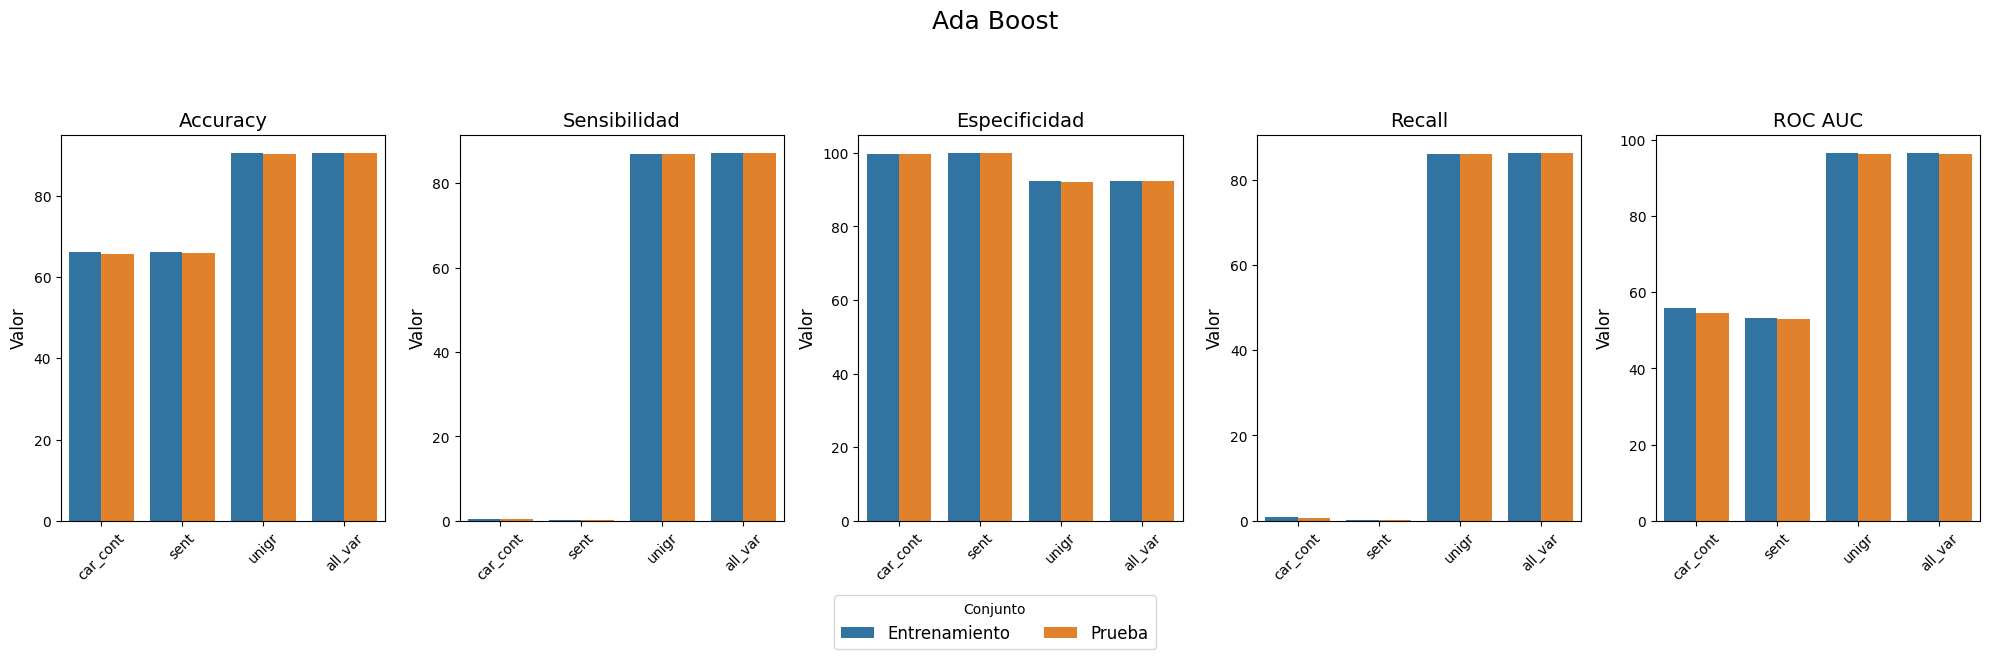

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convertir los datos a formato largo
resultados_long = pd.melt(resultados_AB, id_vars=['Models', 'Conjunto'], 
                          value_vars=['Accuracy', 'Sensibilidad', 'Especificidad', 'Recall', 'ROC AUC'],
                          var_name='Metric', value_name='Value')

# Crear el gráfico con subgráficos
fig, axes = plt.subplots(1, 5, figsize=(20, 6))  # 1 fila y 5 columnas de subgráficos
fig.suptitle('Ada Boost', fontsize=18)  # Título general

# Lista de métricas
metrics = ['Accuracy', 'Sensibilidad', 'Especificidad', 'Recall', 'ROC AUC']

# Inicializar manejadores y etiquetas para la leyenda común
handles, labels = None, None

# Crear los gráficos de barras para cada métrica
for i, metric in enumerate(metrics):
    ax = axes[i]
    barplot = sns.barplot(x='Models', y='Value', hue='Conjunto', 
                          data=resultados_long[resultados_long['Metric'] == metric], ax=ax)
    ax.set_title(metric, fontsize=14)  # Subtítulo con el nombre de la métrica
    ax.set_xlabel('')  # No mostrar etiquetas en el eje x para evitar solapamientos
    ax.set_ylabel('Valor', fontsize=12)
    ax.tick_params(axis='x', rotation=45)  # Rotar etiquetas del eje x para mejor visibilidad
    
    # Obtener manejadores y etiquetas de la primera métrica
    if handles is None and labels is None:
        handles, labels = ax.get_legend_handles_labels()
    ax.legend_.remove()  # Eliminar leyendas individuales

# Añadir una leyenda común debajo de los gráficos
fig.legend(handles, labels, title='Conjunto', loc='lower center', ncol=2, fontsize=12, bbox_to_anchor=(0.5, -0.10))

# Ajustar la disposición para evitar solapamientos
plt.tight_layout(rect=[0, 0, 1, 0.90])  # Ajustar el layout para el título general y la leyenda
plt.show()


DECISION TREE

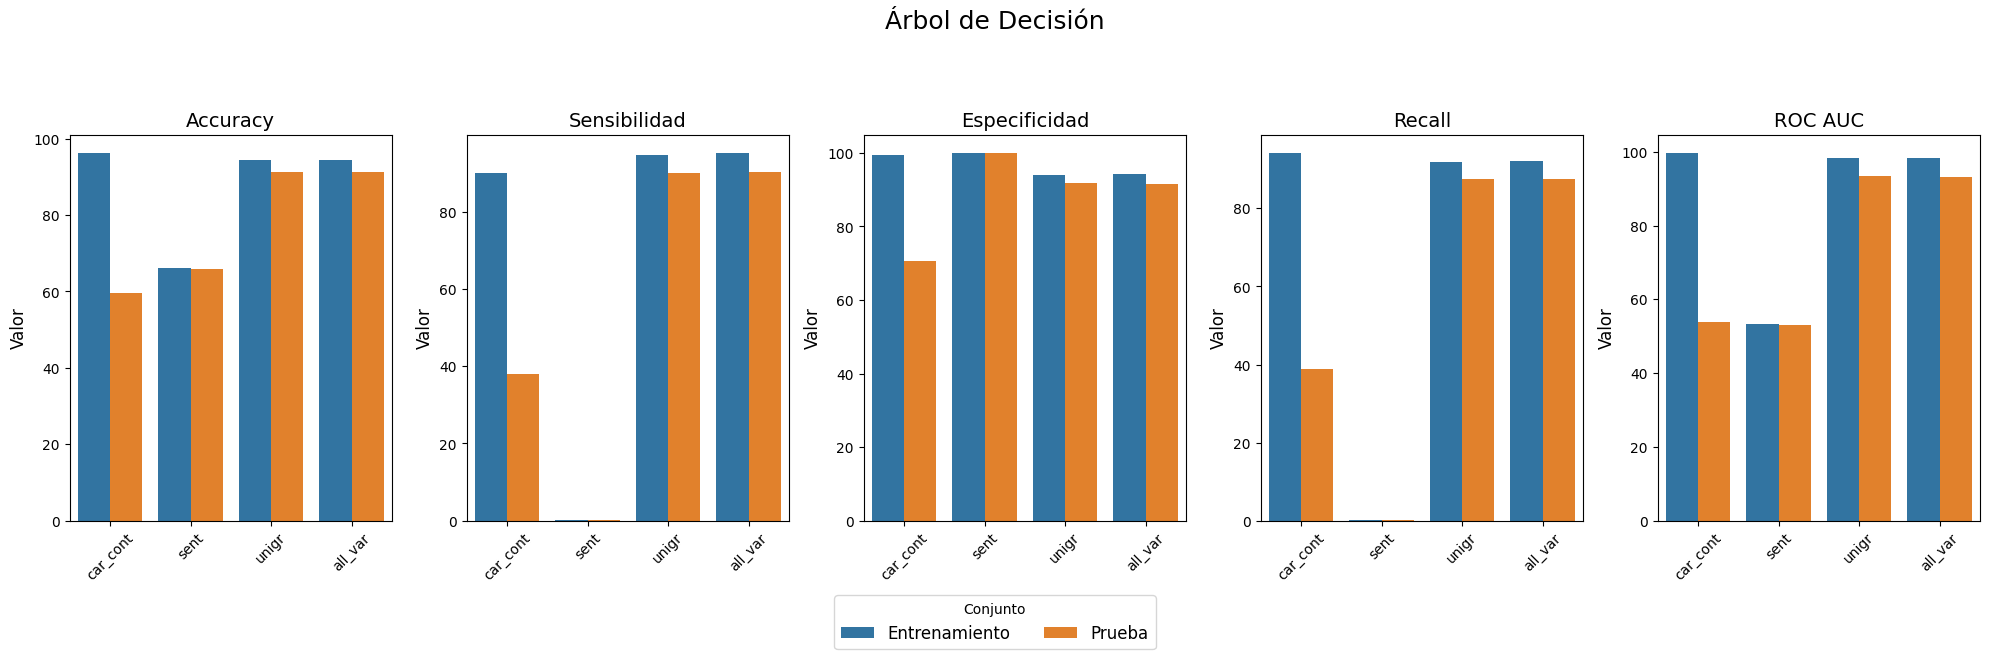

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convertir los datos a formato largo
resultados_long = pd.melt(resultados_DT, id_vars=['Models', 'Conjunto'], 
                          value_vars=['Accuracy', 'Sensibilidad', 'Especificidad', 'Recall', 'ROC AUC'],
                          var_name='Metric', value_name='Value')

# Crear el gráfico con subgráficos
fig, axes = plt.subplots(1, 5, figsize=(20, 6))  # 1 fila y 5 columnas de subgráficos
fig.suptitle('Árbol de Decisión', fontsize=18)  # Título general

# Lista de métricas
metrics = ['Accuracy', 'Sensibilidad', 'Especificidad', 'Recall', 'ROC AUC']

# Inicializar manejadores y etiquetas para la leyenda común
handles, labels = None, None

# Crear los gráficos de barras para cada métrica
for i, metric in enumerate(metrics):
    ax = axes[i]
    barplot = sns.barplot(x='Models', y='Value', hue='Conjunto', 
                          data=resultados_long[resultados_long['Metric'] == metric], ax=ax)
    ax.set_title(metric, fontsize=14)  # Subtítulo con el nombre de la métrica
    ax.set_xlabel('')  # No mostrar etiquetas en el eje x para evitar solapamientos
    ax.set_ylabel('Valor', fontsize=12)
    ax.tick_params(axis='x', rotation=45)  # Rotar etiquetas del eje x para mejor visibilidad
    
    # Obtener manejadores y etiquetas de la primera métrica
    if handles is None and labels is None:
        handles, labels = ax.get_legend_handles_labels()
    ax.legend_.remove()  # Eliminar leyendas individuales

# Añadir una leyenda común debajo de los gráficos
fig.legend(handles, labels, title='Conjunto', loc='lower center', ncol=2, fontsize=12, bbox_to_anchor=(0.5, -0.10))

# Ajustar la disposición para evitar solapamientos
plt.tight_layout(rect=[0, 0, 1, 0.90])  # Ajustar el layout para el título general y la leyenda
plt.show()


# COMPORAMOS LOS MODELOS CON TODAS LAS VARIABLES Y EL BASELINE 

In [21]:

bs=pd.read_csv("G:/Unidades compartidas/Rocío doctorado/Proyecto NLP/Datos/baseline_metrics_LDA.csv")
bs.columns=['Unnamed: 0', 'Accuracy', 'Sensitivity', 'Specificity', 'F1 Score',
       'ROC AUC']
bs

,Unnamed: 0,Accuracy,Sensitivity,Specificity,F1 Score,ROC AUC
0,Train,0.9914,0.9901,0.9942,0.9904,0.6074
1,Test,0.9750,0.9701,0.9854,0.9721,0.6008


In [22]:
# Reemplazar "train" por "entrenamiento" y "test" por "prueba" en la columna 'Unnamed: 0'
bs['Unnamed: 0'] = bs['Unnamed: 0'].replace({'Train': 'Entrenamiento', 'Test': 'Prueba'})


In [23]:
# quiero elegir la mejor combinacion de cada modelo y las guardo en una tabla para luego hacer el grafico de barra
modelos=["BS", "BS","RF", "RF", "RL", "RL","DT" , "DT", "AB", "AB" ]

print(modelos)
resultados=pd.concat([bs,tablas['RF_best_parametros_todas_variables_LDA'], tablas['RL_best_parametros_todas_variables_LDA'], tablas['DT_best_parametros_todas_variablesDe_LDA'], tablas['AB_best_todas_variables_LDA']], axis=0)
#resultados_yuyitos['Modelos']=modelos

resultados['Models']=modelos
resultados


['BS', 'BS', 'RF', 'RF', 'RL', 'RL', 'DT', 'DT', 'AB', 'AB']


,Unnamed: 0,Accuracy,Sensitivity,Specificity,F1 Score,ROC AUC,Models
0,Entrenamiento,0.9914,0.9901,0.9942,0.9904,0.6074,BS
1,Prueba,0.9750,0.9701,0.9854,0.9721,0.6008,BS
0,Entrenamiento,1.0000,0.9999,1.0000,1.0000,1.0000,RF
1,Prueba,0.9201,0.8806,0.9407,0.8828,0.9733,RF
0,Entrenamiento,0.9133,0.8787,0.9311,0.8731,0.9677,RL
1,Prueba,0.9081,0.8747,0.9254,0.8667,0.9643,RL
0,Entrenamiento,0.9452,0.9515,0.9420,0.9219,0.9841,DT
1,Prueba,0.9115,0.9017,0.9166,0.8744,0.9309,DT
0,Entrenamiento,0.9055,0.8710,0.9233,0.8623,0.9658,AB
1,Prueba,0.9052,0.8714,0.9227,0.8626,0.9645,AB


In [24]:
# Lista de columnas que deseas multiplicar por 100
columnas_a_multiplicar = ['Sensitivity','Specificity', 'Accuracy', 'F1 Score', 'ROC AUC']

# Multiplicar por 100 las columnas seleccionadas
resultados[columnas_a_multiplicar] = resultados[columnas_a_multiplicar].apply(lambda x: round(x * 100, 2))



In [25]:
resultados.columns

Index(['Unnamed: 0', 'Accuracy', 'Sensitivity', 'Specificity', 'F1 Score',
       'ROC AUC', 'Models'],
      dtype='object')

In [26]:
resultados = resultados.rename(columns={
    'Specificity': 'Especificidad', 
    'F1 Score': 'Recall', 
    'ROC AUC': 'ROC AUC',
    'Sensitivity': 'Sensibilidad',
    'Unnamed: 0': 'Conjunto'
})



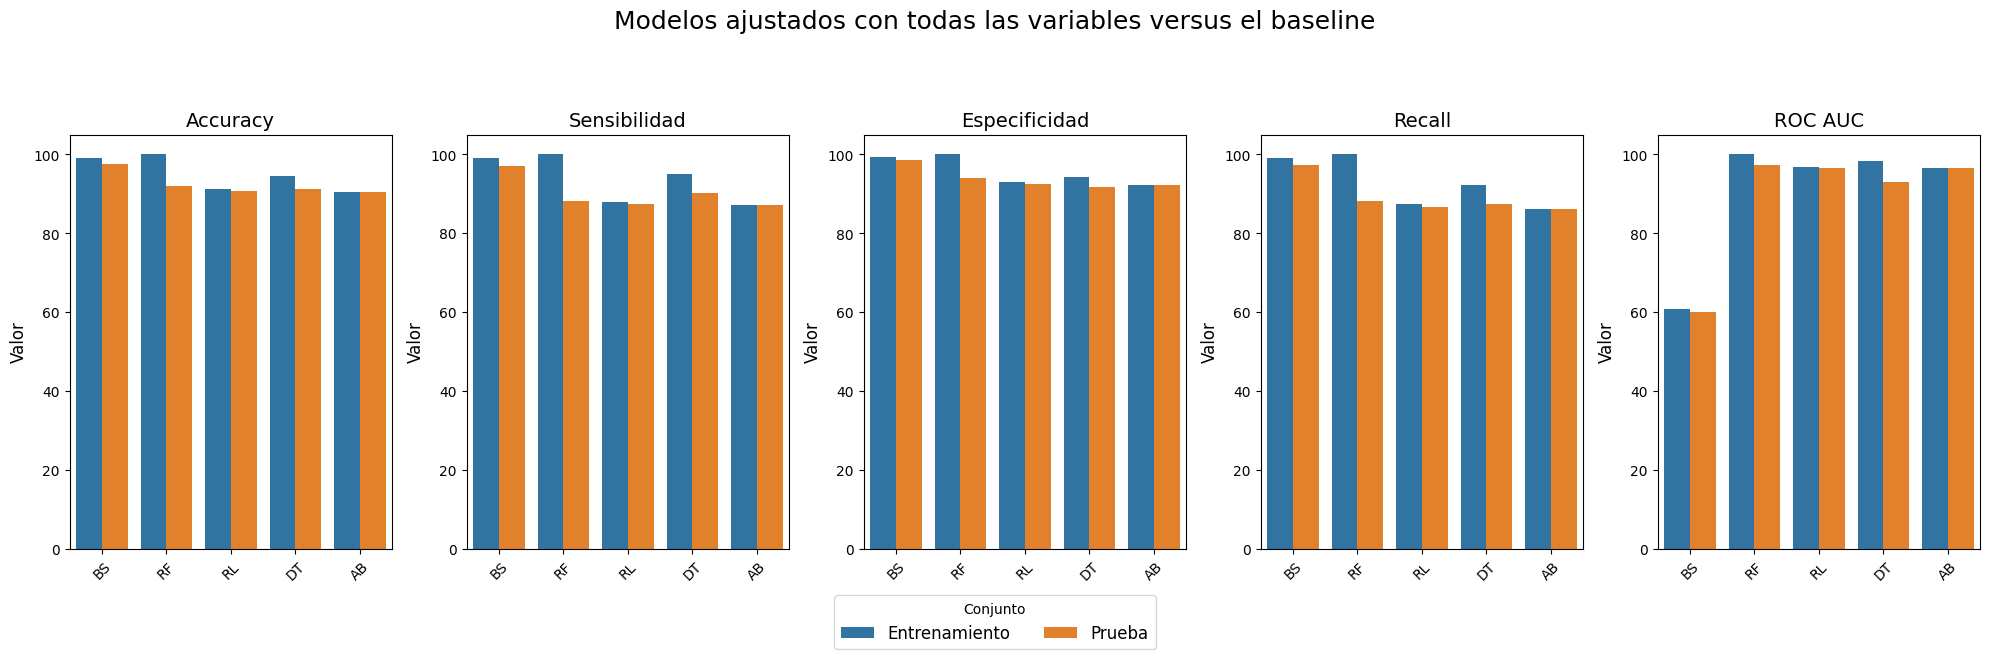

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que 'resultados_RF' es tu DataFrame
# Convertir los datos a formato largo
resultados_long = pd.melt(resultados, id_vars=['Models', 'Conjunto'], 
                          value_vars=['Accuracy', 'Sensibilidad', 'Especificidad', 'Recall', 'ROC AUC'],
                          var_name='Metric', value_name='Value')

# Crear el gráfico con subgráficos
fig, axes = plt.subplots(1, 5, figsize=(20, 6))  # 1 fila y 5 columnas de subgráficos
fig.suptitle('Modelos ajustados con todas las variables versus el baseline', fontsize=18)  # Título general

# Lista de métricas
metrics = ['Accuracy', 'Sensibilidad', 'Especificidad', 'Recall', 'ROC AUC']

# Crear los gráficos de barras para cada métrica
handles, labels = None, None  # Inicializar manejadores y etiquetas para la leyenda
for i, metric in enumerate(metrics):
    ax = axes[i]
    barplot = sns.barplot(x='Models', y='Value', hue='Conjunto', 
                          data=resultados_long[resultados_long['Metric'] == metric], ax=ax)
    ax.set_title(metric, fontsize=14)  # Subtítulo con el nombre de la métrica
    ax.set_xlabel('')  # No mostrar etiquetas en el eje x para evitar solapamientos
    ax.set_ylabel('Valor', fontsize=12)
    ax.tick_params(axis='x', rotation=45)  # Rotar etiquetas del eje x para mejor visibilidad
    if handles is None and labels is None:
        handles, labels = ax.get_legend_handles_labels()  # Obtener colores y etiquetas de la primera métrica
    ax.legend_.remove()  # Eliminar leyendas individuales de los subgráficos

# Añadir una leyenda común debajo de los gráficos con los colores de las barras
fig.legend(handles, labels, title='Conjunto', loc='lower center', ncol=2, fontsize=12, bbox_to_anchor=(0.5, -0.10))

# Ajustar la disposición para evitar solapamientos
plt.tight_layout(rect=[0, 0, 1, 0.90])  # Ajustar el layout para el título general y la leyenda
plt.show()
